In [ ]:
# Install Scrapy first: use command and run: 
!conda install -c conda-forge scrapy

In [ ]:
#Install Scrapy from home directory (EX. C:/Users/Prav)
!pip install scrapy
#After installation scrapy it will create following directories below
#C:\Users\Prav\amazon_reviews_scraping\amazon_reviews_scraping\spiders

In [ ]:
#we need to update review.py with our python program to get latest data or reviews
# -*- coding: utf-8 -*-
 
# Importing Scrapy Library
import scrapy
 
# Creating a new class to implement Spide
class AmazonReviewsSpider(scrapy.Spider):
 
    # Spider name
    name = 'amazon_reviews'
 
    # Domain names to scrape
    allowed_domains = ['amazon.com']
 
    # Base URL for the Samsung Phone reviews
    myBaseUrl = "https://www.amazon.com/Samsung-Unlocked-Fingerprint-Recognition-Long-Lasting/dp/B082XY23D5/ref=sr_1_3?dchild=1&keywords=samsung%2Bs20&qid=1606682820&sr=8-3&th=1"
    start_urls=[]
 
    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))
 
    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')
 
            # Collecting product star ratings
            star_rating = data.css('.review-rating')
 
            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0
 
            # Combining the results
            for review in star_rating:
                yield{'stars': ''.join(review.xpath('.//text()').extract()),
                      'comment': ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1

In [ ]:
#Run the program below. This will create review. csv
! C:\Users\Prav\amazon_reviews_scraping\amazon_reviews_scraping\spiders>scrapy runspider amazon_review.py -o review.csv

In [2]:
#importing pandas dataframe will make it easier csv file
import scrapy # import scrapy
import pandas as pd #import pandas dataframe to easier read data
import matplotlib as plt #visualize and plot data
 
df=pd.read_csv("review.csv") #read csv
df.head(25) #bring first 25



,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


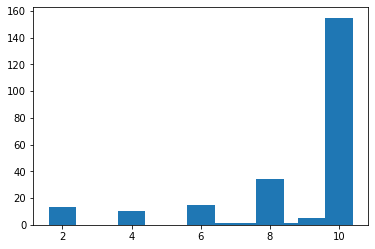

In [6]:
#Scoring for the reviews to plot
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt 
 
dataset = pd.read_csv("review.csv")
summarised_results = dataset["score"].value_counts() #trial and error
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [9]:
!dir #show directories

 Volume in drive C is OS
 Volume Serial Number is 4065-5A2D

 Directory of C:\Users\Prav

11/29/2020  04:10 PM    <DIR>          .
11/29/2020  04:10 PM    <DIR>          ..
05/05/2019  12:14 PM    <DIR>          .anaconda
12/28/2019  05:14 PM                57 .angular-config.json
04/16/2020  12:36 PM    <DIR>          .astropy
07/23/2019  11:49 AM    <DIR>          .azure
10/27/2020  06:28 PM             5,728 .bash_history
05/10/2020  08:30 PM    <DIR>          .bundle
08/25/2020  10:36 AM    <DIR>          .conda
08/25/2020  10:37 AM                43 .condarc
08/13/2020  05:54 PM    <DIR>          .config
07/29/2019  10:02 PM             1,038 .csslintrc
07/11/2019  09:10 PM    <DIR>          .docker
08/13/2020  03:06 PM    <DIR>          .dotnet
12/19/2019  11:08 AM    <DIR>          .eclipse
04/28/2020  06:04 PM    <DIR>          .gem
02/24/2020  11:41 AM               105 .gitconfig
01/19/2020  10:42 AM    <DIR>          .grasp_settings
11/26/2020  08:26 PM    <DIR>          .ip

0

0

0

0

,Jbl_review,rating
